Logistic Regression Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
k-NN Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]
SVM Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]

Accuracies:
Logistic Regression: 0.9111111111111111
k-NN: 0.9111111111111111
SVM: 0.9111111111111111


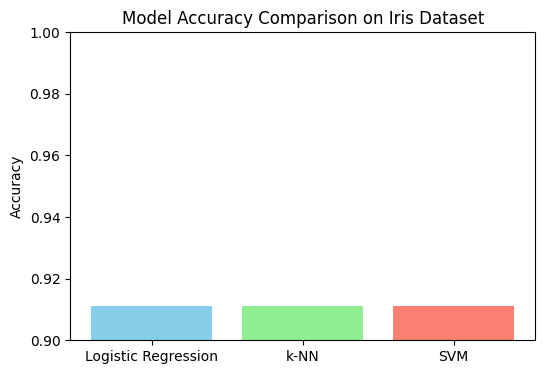

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# SVM
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
# Confusion Matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Accuracy Scores
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_svm = accuracy_score(y_test, y_pred_svm)

print("Logistic Regression Confusion Matrix:\n", cm_lr)
print("k-NN Confusion Matrix:\n", cm_knn)
print("SVM Confusion Matrix:\n", cm_svm)

print("\nAccuracies:")
print("Logistic Regression:", acc_lr)
print("k-NN:", acc_knn)
print("SVM:", acc_svm)
# Bar chart
models = ['Logistic Regression', 'k-NN', 'SVM']
accuracies = [acc_lr, acc_knn, acc_svm]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0.9, 1.0)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison on Iris Dataset')
plt.show()
